<a href="https://colab.research.google.com/github/KarltonBotics/Integrador_CentinelAI/blob/main/Avances_1_y_2_centinelAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 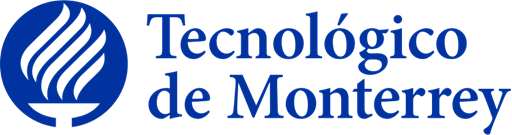


Maestría en Inteligencia Artificial Aplicada
**texto en negrita**
Proyecto Integrador
Septiembre – Diciembre
2025

Actividad 3
Avance 1. Análisis exploratorio de datos

Docentes:

*  Dra. Grettel Barceló Alonso
*  Dra. Verónica Sandra Guzmán De Valle

Asesor:

*   Dr. Luis Eduardo Falcón

Alumno:
*   Carlos Enríquez Gorgonio
A01793102
  
Septiembre 2025


#<mark>** AVANCE 1**</mark>
<p style="text-align: justify;"> Este primer avance consiste en realizar un análisis exploratorio de datos (EDA - Exploratory Data Analysis), es decir, describir los datos utilizando técnicas estadísticas y de visualización (análisis univariante y bi/multivariante) para hacer enfoque en sus aspectos más relevantes, así como aplicar y justificar operaciones de preprocesamiento, relacionadas con el manejo de valores faltantes, atípicos y alta cardinalidad. Es importante que incluyan sus conclusiones del EDA, identificando tendencias o relaciones importantes. </dp>
Las siguientes son algunas de las preguntas comunes que podrán abordar a través del EDA:

    ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?
    ¿Cuáles son las estadísticas resumidas del conjunto de datos?
    ¿Hay valores atípicos en el conjunto de datos?
    ¿Cuál es la cardinalidad de las variables categóricas?
    ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?
    ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
    ¿Hay correlación entre las variables dependientes e independientes?
    ¿Cómo se distribuyen los datos en función de diferentes categorías? (análisis bivariado)
    ¿Se deberían normalizar las imágenes para visualizarlas mejor?
    ¿Hay desequilibrio en las clases de la variable objetivo?

</div>

**1.-IMPORTACIÓN DE LIBRERíAS**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import pyproj
from scipy.stats import skew
from tabulate import tabulate
from scipy.stats import chi2_contingency
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose

**2.-CARGA Y VISUALIZACIÓN DE ENCABEZADOS DEL DATASET**


El ejercicio se inicio con un DataSet de la mitad del tamaño, llamado:<br>
**df_forestal**<br>
El nombre de nuestro DataSet Final en Excel es:<br>
**DataSetFinal25_17**<br>



In [2]:
#file_path = '/mnt/DataSetFinal25_17.xlsx'
file_path = '/mnt/DataSetFinal25_17.xlsx'
df = pd.read_excel(file_path, header=0)
df.head()

dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")

El DataFrame tiene: 1093 filas
El DataFrame tiene: 27 columnas


**COMENTARIOS:**<br>
Observamos que nuestro data set tiene 27 features y 10,93 registros que nos permitiran trabajar posteriormente

**3.-COMPROBACIÓN DE LOS TIPOS DE DATOS DE CADA COLUMNA**

In [3]:
print(df.dtypes)

CLAVE DE INCENDIO             object
FECHA DE REPORTE      datetime64[ns]
LONGITUD GRADOS              float64
LONGITUD MINUTOS             float64
LONGITUD SEGUNDOS            float64
LATITUD GRADOS               float64
LATITUD MINUTOS              float64
LATITUD SEGUNDOS             float64
LATITUD                      float64
LONGITUD                     float64
CLAVE MUNICIPIO              float64
NOMBRE MUNICIPIO              object
PREDIO O PARAJE               object
CAUSA DEL INCENDIO            object
CAUSA ESPECIFICA              object
FECHA INICIO                  object
FECHA LIQUIDACION             object
TIPO DE INCENDIO              object
TIPO DE VEGETACION            object
ZONA BIOCLIMATICA             object
ARBOLADO ADULTO              float64
RENUEVO                      float64
ARBUSTIVO                    float64
HERBACEO                     float64
HOJARASCA                    float64
TOTAL HA                     float64
COSTO ESTIMADO               float64
d

**COMENTARIOS:**<br>

Se observa que nuestros features numéricos están en tipo float64, lo que es apropiado para nuestra actividad, sin embargo, nuestros valores tipo fecha se encuentran en formato object, por lo que posteriormente en la actividad 2 se procederá a realizar la transformación correspondiente.

NOTA: Antes de trabajar, debemos asegurarnos que nuestros encabezados no tienen acentos ni espacios de mas

In [4]:
df.columns = df.columns.str.strip()

**4.- VISUALIZACIÓN DE LA DISTRIBUCIÓN**<br>

Para esta distribución utilizaremos un histograma que nos permitira ver la cantidad de eventos usando el feature de fecha, pretendemos observar los meses de cada año con mayor cantidad de eventos.


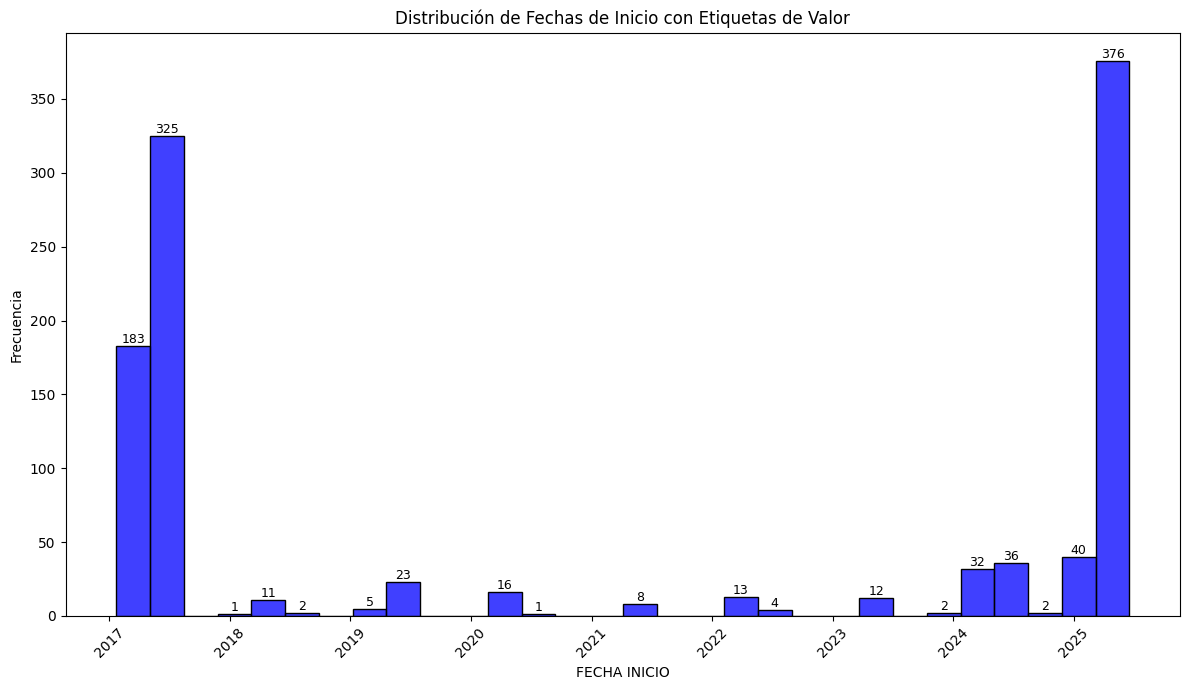

In [5]:
df['FECHA INICIO'] = pd.to_datetime(df['FECHA INICIO'], errors='coerce')
df.dropna(subset=['FECHA INICIO'], inplace=True)

plt.figure(figsize=(12, 7))
ax = sns.histplot(df['FECHA INICIO'], kde=False, bins=30, color='blue')

for p in ax.patches:
    if p.get_height() > 0:
        ax.text(p.get_x() + p.get_width() / 2.,
                p.get_height(),
                f'{int(p.get_height())}',
                fontsize=9,
                ha='center',
                va='bottom')

plt.title('Distribución de Fechas de Inicio con Etiquetas de Valor')
plt.xlabel('FECHA INICIO')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('histograma_con_etiquetas.png')
plt.show()

**COMENTARIOS:**<br>

Se observa una distribución notoriamente desbalanceada, ya que únicamente los años 2017 y 2025, acumulan la mayoría de los incendios


**5.- VISUALIZACIÓN DE ESTADÍSTICAS DESCRIPTIVAS**


In [6]:
df.describe()

,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,CLAVE MUNICIPIO,FECHA INICIO,ARBOLADO ADULTO,RENUEVO,ARBUSTIVO,HERBACEO,HOJARASCA,TOTAL HA,COSTO ESTIMADO
count,500,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,5.780000e+02,5.780000e+02,500.000000,1092,500.000000,825.000000,892.000000,973.000000,828.000000,1092.000000,500.000000
mean,2025-04-20 09:55:24.360000,104.750000,30.71000,30.411160,23.108000,34.656000,29.170780,3.777886e+06,1.624874e+07,18.960000,2021-02-15 15:44:10.549450496,1.887349,10.294015,55.305963,69.177452,68.159821,168.765200,21036.324000
min,2023-05-18 18:14:00,103.000000,0.00000,0.000000,22.000000,0.000000,0.000000,2.324840e+04,1.052402e+05,1.000000,2017-01-22 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2025-05-06 01:41:00,104.000000,20.00000,15.517500,22.000000,17.000000,15.000000,2.259373e+05,1.043554e+06,14.000000,2017-05-16 00:00:00,0.000000,0.000000,0.958900,2.000000,2.000000,5.478325,4980.000000
50%,2025-06-11 12:27:30,105.000000,31.50000,30.495000,23.000000,40.000000,29.000000,2.346215e+05,1.052118e+06,17.000000,2019-06-10 00:00:00,0.000000,0.740000,5.536650,10.000000,10.000000,23.163050,10470.000000
75%,2025-07-29 10:27:30,105.000000,42.00000,44.615000,24.000000,50.000000,44.005000,2.509215e+05,1.061566e+06,23.000000,2025-04-05 00:00:00,0.000000,4.550000,27.005525,40.000000,44.730000,90.449475,17415.000000
max,2025-08-18 10:30:00,107.000000,59.00000,59.990000,26.000000,59.000000,59.050000,2.544564e+07,1.064503e+08,37.000000,2025-06-18 00:00:00,190.000000,701.907500,2978.642900,3700.000000,2647.682600,9409.864000,611360.000000
std,NaN,0.807964,15.13923,17.132735,1.017057,18.473229,16.846152,8.603386e+06,3.691866e+07,8.762189,NaN,11.489577,47.880213,205.875464,253.480499,218.205434,637.206408,45017.067681


In [7]:
df.describe(include='all')

,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,TIPO DE INCENDIO,TIPO DE VEGETACION,ZONA BIOCLIMATICA,ARBOLADO ADULTO,RENUEVO,ARBUSTIVO,HERBACEO,HOJARASCA,TOTAL HA,COSTO ESTIMADO
count,1092.0,500,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,5.780000e+02,5.780000e+02,...,1015,997,495,500.000000,825.000000,892.000000,973.000000,828.000000,1092.000000,500.000000
unique,1008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,19,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Superficial,Bosque de Pino - BP,Templada subhúmeda,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,992,294,427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2025-04-20 09:55:24.360000,104.750000,30.71000,30.411160,23.108000,34.656000,29.170780,3.777886e+06,1.624874e+07,...,NaN,NaN,NaN,1.887349,10.294015,55.305963,69.177452,68.159821,168.765200,21036.324000
min,NaN,2023-05-18 18:14:00,103.000000,0.00000,0.000000,22.000000,0.000000,0.000000,2.324840e+04,1.052402e+05,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2025-05-06 01:41:00,104.000000,20.00000,15.517500,22.000000,17.000000,15.000000,2.259373e+05,1.043554e+06,...,NaN,NaN,NaN,0.000000,0.000000,0.958900,2.000000,2.000000,5.478325,4980.000000
50%,NaN,2025-06-11 12:27:30,105.000000,31.50000,30.495000,23.000000,40.000000,29.000000,2.346215e+05,1.052118e+06,...,NaN,NaN,NaN,0.000000,0.740000,5.536650,10.000000,10.000000,23.163050,10470.000000
75%,NaN,2025-07-29 10:27:30,105.000000,42.00000,44.615000,24.000000,50.000000,44.005000,2.509215e+05,1.061566e+06,...,NaN,NaN,NaN,0.000000,4.550000,27.005525,40.000000,44.730000,90.449475,17415.000000
max,NaN,2025-08-18 10:30:00,107.000000,59.00000,59.990000,26.000000,59.000000,59.050000,2.544564e+07,1.064503e+08,...,NaN,NaN,NaN,190.000000,701.907500,2978.642900,3700.000000,2647.682600,9409.864000,611360.000000


**COMENTARIOS:**<br>

No se pueden obtener observaciones relevantes ya que se está trabajando con valores que por si solos no tienen mucho sentido, por ejemplo, la media de las coordenadas no es analizable de esta forma, se requiere un método de recurrencia para nuestro objetivo.<br>

Sin embargo, hay datos que nos permiten hacer observaciones simples como la fecha de nuestro primer evento al ser el valor mínimo en la FECHA INICIO, el 07 de enero de 2017. Así como los valores top en municipio correspondiente al “Mezquital” y al tipo de vegetación “Arbustivo”, y la causa “intencional”



**6.-IDENTIFICACIÓN DE COLUMNAS COMPLETAS Y COLUMNAS CON DATOS FALTANTES**

In [8]:
conteo_faltantes = df.isnull().sum()
columnas_completas = conteo_faltantes[conteo_faltantes == 0].index.tolist()

print("Las columnas que no tienen datos faltantes son:", columnas_completas)

Las columnas que no tienen datos faltantes son: ['CLAVE DE INCENDIO', 'NOMBRE MUNICIPIO', 'FECHA INICIO', 'TOTAL HA']


In [9]:
faltantes = df.isna().sum()

porcentaje_faltantes = (faltantes / len(df)) * 100

resultado = pd.DataFrame({
    'Cantidad faltante': faltantes,
    'Porcentaje faltante': porcentaje_faltantes
})

print(resultado)

                    Cantidad faltante  Porcentaje faltante
CLAVE DE INCENDIO                   0             0.000000
FECHA DE REPORTE                  592            54.212454
LONGITUD GRADOS                   592            54.212454
LONGITUD MINUTOS                  592            54.212454
LONGITUD SEGUNDOS                 592            54.212454
LATITUD GRADOS                    592            54.212454
LATITUD MINUTOS                   592            54.212454
LATITUD SEGUNDOS                  592            54.212454
LATITUD                           514            47.069597
LONGITUD                          514            47.069597
CLAVE MUNICIPIO                   592            54.212454
NOMBRE MUNICIPIO                    0             0.000000
PREDIO O PARAJE                    27             2.472527
CAUSA DEL INCENDIO                105             9.615385
CAUSA ESPECIFICA                  106             9.706960
FECHA INICIO                        0             0.0000

**COMENTARIOS:**<br>

Afortunadamente los valores principales como FECHA INICIO y MUNICIPIO, ya nos permite trabaja correctamente para nuestro objetivo de identificación de eventos por ubicación geográfica.<br>

Cabe señalar que los features de LATITUD y LONGITUD dispersos en 6 columnas, pueden resultar llamativos por la cantidad de datos faltantes, que corresponden a la mitad del dataset, ya que derivado del análisis del primer dataset, como se comentó al inicio, tienen estas dos columnas distribuidas en 2 partes, sin embargo, posteriormente en la actividad 2, realizaremos la integración y por lo tanto nuestras columnas de LATITUD y LONGITUD quedaran sin datos faltantes.<br>

Por ultimo se observa que features relevantes como TIPO DE INCENDIO y TIPO DE VEGETACION tienen menos del 10% de valores faltantes.

**7.- IDENTIFICACIÓN DE OUTLIERS**

El enfoque de nuestros outliers es ubicar las fechas y municipios con mayor cantidad de incendios

In [10]:
df['FECHA INICIO'] = pd.to_datetime(df['FECHA INICIO'], errors='coerce')
df.dropna(subset=['FECHA INICIO'], inplace=True)

df['Año'] = df['FECHA INICIO'].dt.year
df['Mes_num'] = df['FECHA INICIO'].dt.month

conteo_mensual = df.groupby(['Año', 'Mes_num']).size().reset_index(name='Eventos')

df['Año'] = df['Año'].astype(int)
todos_los_meses = pd.DataFrame([(año, mes) for año in df['Año'].unique() for mes in range(1, 13)],
                               columns=['Año', 'Mes_num'])

conteo_mensual_completo = pd.merge(todos_los_meses, conteo_mensual, on=['Año', 'Mes_num'], how='left').fillna(0)

meses_dict = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
              7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

conteo_mensual_completo['Mes'] = conteo_mensual_completo['Mes_num'].map(meses_dict)
conteo_mensual_completo['Eventos'] = conteo_mensual_completo['Eventos'].astype(int)


conteo_con_eventos = conteo_mensual_completo[conteo_mensual_completo['Eventos'] > 0]

conteo_final_ordenado = conteo_con_eventos.sort_values(by='Eventos', ascending=False)

print(conteo_final_ordenado[['Año', 'Mes', 'Eventos']])


      Año        Mes  Eventos
100  2017       Mayo      232
99   2017      Abril      119
4    2025       Mayo      115
101  2017      Junio      113
3    2025      Abril      112
2    2025      Marzo       92
5    2025      Junio       66
98   2017      Marzo       35
16   2024       Mayo       24
1    2025    Febrero       23
15   2024      Abril       19
17   2024      Junio       14
76   2019       Mayo       12
29   2023      Junio       10
64   2020       Mayo       10
14   2024      Marzo       10
77   2019      Junio        7
97   2017    Febrero        7
39   2022      Abril        7
0    2025      Enero        6
75   2019      Abril        6
87   2018      Abril        6
53   2021      Junio        5
41   2022      Junio        4
89   2018      Junio        4
63   2020      Abril        4
40   2022       Mayo        4
52   2021       Mayo        3
27   2023      Abril        2
12   2024      Enero        2
88   2018       Mayo        2
74   2019      Marzo        2
62   2020 

Distribución de incidencias agrupando por meses del año

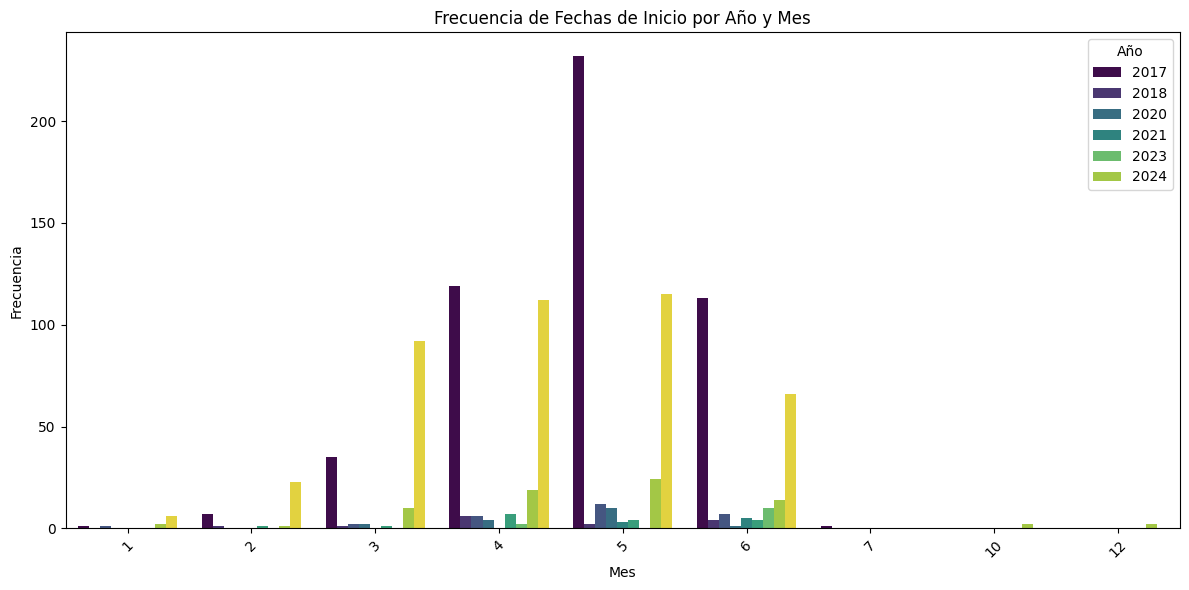

In [11]:
df['FECHA INICIO'] = pd.to_datetime(df['FECHA INICIO'], errors='coerce')

df['Año'] = df['FECHA INICIO'].dt.year
df['Mes'] = df['FECHA INICIO'].dt.month_name()  # Mes como nombre (enero, febrero, etc.)

df_grouped = df.groupby(['Año', 'Mes']).size().reset_index(name='Frecuencia')

df_grouped['Mes'] = pd.to_datetime(df_grouped['Mes'], format='%B').dt.month  # Convertir mes a número
df_grouped = df_grouped.sort_values(by=['Año', 'Mes'])

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='Mes', y='Frecuencia', hue='Año', palette='viridis')

plt.title('Frecuencia de Fechas de Inicio por Año y Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()

plt.show()

Identificación de tendencias temporales con base en los features de fechas


/tmp/ipython-input-4192942049.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df.set_index(col).resample('M').size()


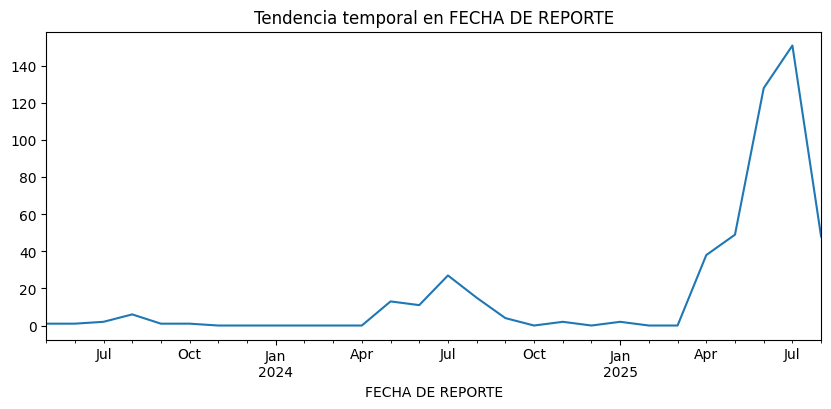

/tmp/ipython-input-4192942049.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df.set_index(col).resample('M').size()


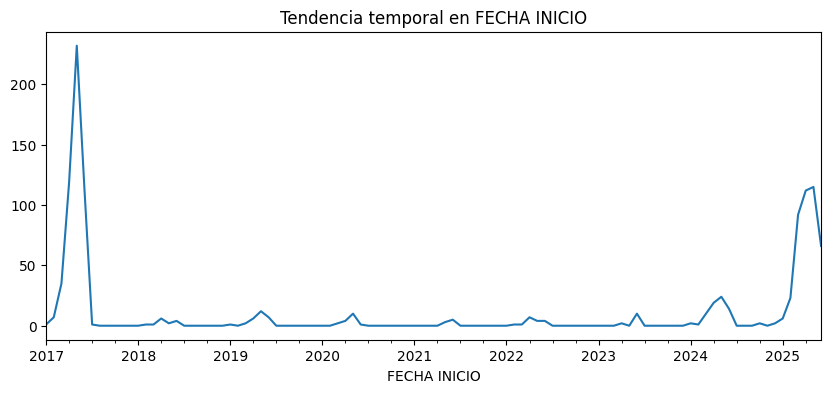

/tmp/ipython-input-4192942049.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = df.set_index(col).resample('M').size()


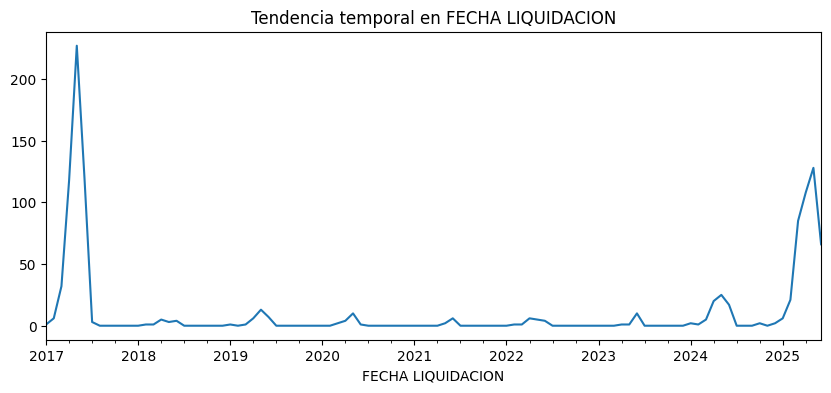

In [12]:
# Buscamos columnas que sean de tipo fecha
fechas = [c for c in df.columns if 'fecha' in c.lower() or 'date' in c.lower()]

for col in fechas:
    # Convertimos la columna a tipo datetime
    df[col] = pd.to_datetime(df[col], errors='coerce')
    # Reagregamos valores por mes
    serie = df.set_index(col).resample('M').size()

    # Graficamos evolución en el tiempo
    plt.figure(figsize=(10,4))
    serie.plot()
    plt.title(f'Tendencia temporal en {col}')
    plt.show()

**ENFOQUE EN MUNICIPIOS Y NO EN FECHAS**


In [13]:
conteo_municipios = df['NOMBRE MUNICIPIO'].value_counts().reset_index()
conteo_municipios.columns = ['NOMBRE MUNICIPIO', 'Número de Incendios']

print("Municipios con mayor número de incendios:")
print(conteo_municipios.head(10))

Municipios con mayor número de incendios:
       NOMBRE MUNICIPIO  Número de Incendios
0             Mezquital                  367
1          Pueblo Nuevo                  258
2             San Dimas                  110
3               Durango                   83
4            Tepehuanes                   73
5              Tamazula                   46
6               Canelas                   33
7  Santiago Papasquiaro                   32
8                 Topia                   18
9             Guanacevi                   12


**COMENTARIOS:**<br>

Se pueden observar claramente los outliers principalmente en las fechas, específicamente en la cantidad de eventos en el año 2017 y 2025, las tendencias centralizadas en los meses correspondientes a las estaciones de primavera y verano, así como 3 municipios que agrupan la mayor cantidad de eventos.

**8.-BÚSQUEDA INICIAL CORRELACIONES SIN NINGÚN TRATAMIENTO PREVIO DE DATOS**




Se ha generado el diagrama 'diagrama_asociacion_final.png' con éxito.

Matriz de V de Cramer:
                    NOMBRE MUNICIPIO  TIPO DE INCENDIO  TIPO DE VEGETACION  \
NOMBRE MUNICIPIO            1.000000          0.436680            0.303093   
TIPO DE INCENDIO            0.436680          1.000000            0.039307   
TIPO DE VEGETACION          0.303093          0.039307            1.000000   
MES_INICIO                  0.067066          0.035088            0.084087   

                    MES_INICIO  
NOMBRE MUNICIPIO      0.067066  
TIPO DE INCENDIO      0.035088  
TIPO DE VEGETACION    0.084087  
MES_INICIO            1.000000  


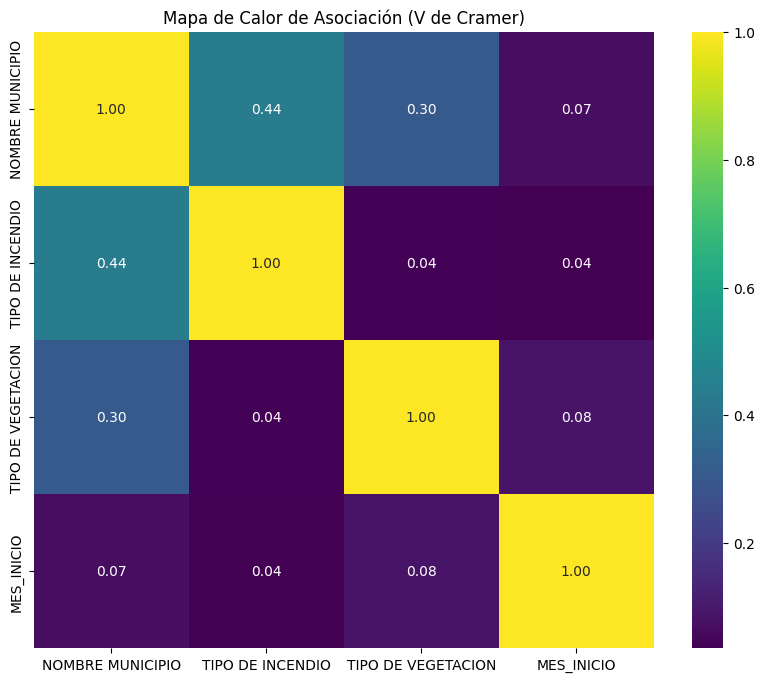

In [14]:
#df = pd.read_csv('DataSetFinal25_17.xlsx - Hoja1.csv', parse_dates=['FECHA INICIO'])

df['MES_INICIO'] = df['FECHA INICIO'].dt.strftime('%B')

cols = ['NOMBRE MUNICIPIO', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION', 'MES_INICIO']
df_categorical = df[cols].copy()

def cramers_v(x, y):
    """ Calcula la V de Cramer para dos variables categóricas. """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    if min((k_corr-1), (r_corr-1)) == 0:
        return 0
    else:
        return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

cramers_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)

for col1 in cols:
    for col2 in cols:
        cramers_matrix.loc[col1, col2] = cramers_v(df_categorical[col1], df_categorical[col2])

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mapa de Calor de Asociación (V de Cramer)')
plt.savefig('diagrama_asociacion_final.png')

# Paso 8: Mostrar los resultados en la terminal
print("Se ha generado el diagrama 'diagrama_asociacion_final.png' con éxito.")
print("\nMatriz de V de Cramer:")
print(cramers_matrix)

**COMENTARIOS:**<br>

Se observa una correlación mayor entre el TIPO DE INCENDIO, TIPO DE VEGETACION y el NOMBRE MUNICIPIO, es decir si hay características que nos pueden dar resultados trascendentes en las predicciones del proyecto


**9.- DISTRIBUCIÓN BIVARIADA**

Usaremos TIPO DE VEGETACIÓN , TIPO DE INCENDIO, NOMBRE MUNICIPIO Y FECHA


Tabla de Distribución (Vegetación vs. Tipo de Incendio):
TIPO DE INCENDIO                     De copa  Mixto  Superficial  Superficial 
TIPO DE VEGETACION                                                            
Bosque de Ayarin -BS                       0      0            3             0
Bosque de Ayarín                           0      0            2             0
Bosque de Encino                           0      0           40             0
Bosque de Encino  - BQ                     0      0           18             0
Bosque de Encino-Pino                      0      0           55             2
Bosque de Encino-Pino - BQP                0      0           11             0
Bosque de Pino                             1      0          189            14
Bosque de Pino - BP                        0      5          288             0
Bosque de Pino-Encino                      0      0          161             1
Bosque de Pino-Encino - BPQ                0      0          103         

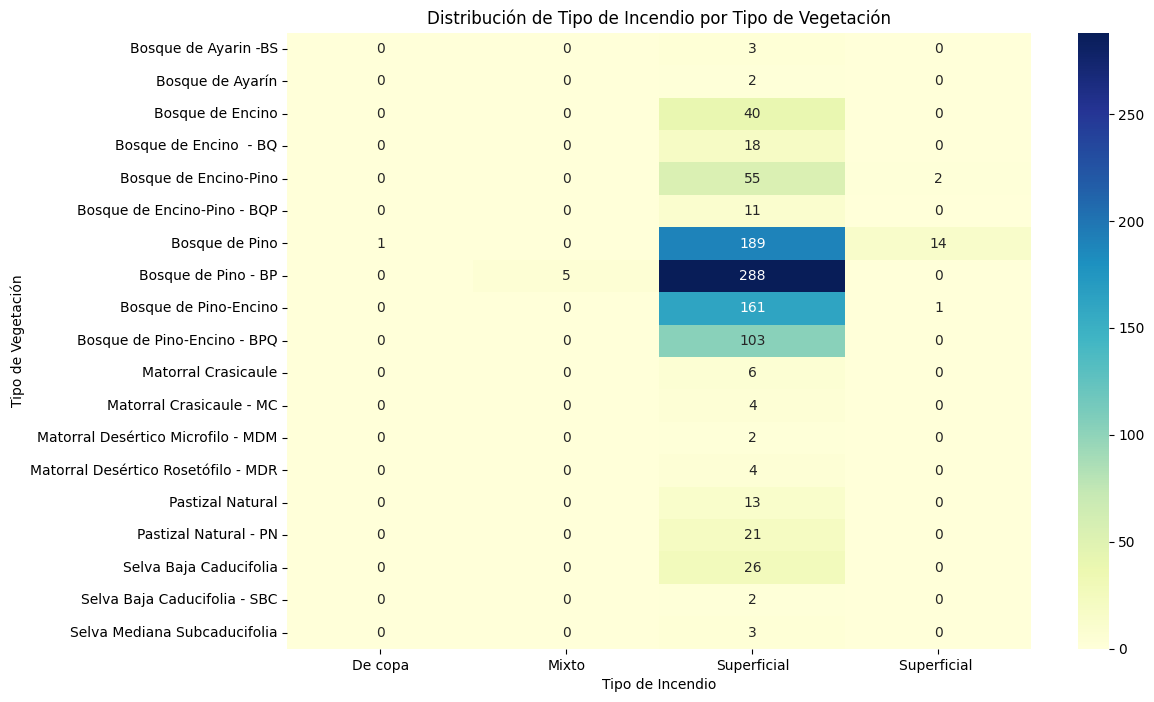

In [15]:

vegetacion_vs_incendio = pd.crosstab(df['TIPO DE VEGETACION'], df['TIPO DE INCENDIO'])

print("\nTabla de Distribución (Vegetación vs. Tipo de Incendio):")
print(vegetacion_vs_incendio)

plt.figure(figsize=(12, 8))
sns.heatmap(vegetacion_vs_incendio, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribución de Tipo de Incendio por Tipo de Vegetación')
plt.xlabel('Tipo de Incendio')
plt.ylabel('Tipo de Vegetación')
plt.savefig('analisis1_vegetacion_vs_incendio.png')


Tabla de Distribución (Municipio vs. Mes):
MES_INICIO            January  February  March  April  May  June  July  \
NOMBRE MUNICIPIO                                                         
CANELAS                     0         0      0      0    1     0     0   
Canatlan                    0         0      2      2    2     2     0   
Canatlán                    0         0      0      1    0     1     0   
Canelas                     0         1      5      5   19     3     0   
Cuencamé                    0         0      0      0    1     0     0   
Durango                     4        10     12     21   22    14     0   
El Oro                      0         0      1      0    0     0     0   
Guanacevi                   0         0      0      2    7     3     0   
Guanaceví                   0         0      2      4    1     0     0   
Lerdo                       0         1      4      1    0     0     0   
Mezquital                   0         8     58    104  124    73    

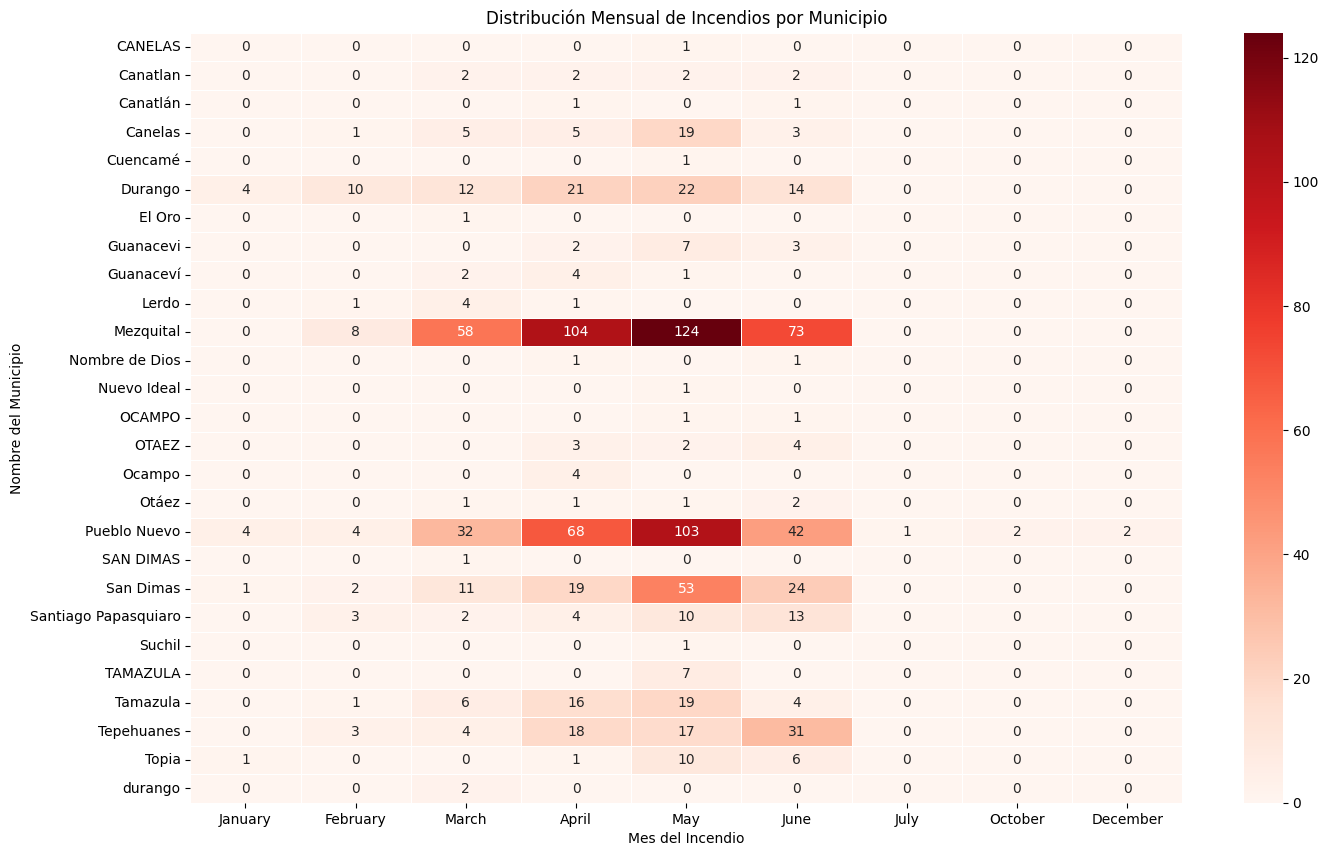

In [16]:
df['MES_INICIO'] = df['FECHA INICIO'].dt.month_name()

meses_en_orden = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['MES_INICIO'] = pd.Categorical(df['MES_INICIO'], categories=meses_en_orden, ordered=True)

municipio_vs_mes = pd.crosstab(df['NOMBRE MUNICIPIO'], df['MES_INICIO'])

print("\nTabla de Distribución (Municipio vs. Mes):")
print(municipio_vs_mes)

plt.figure(figsize=(16, 10))
sns.heatmap(municipio_vs_mes, annot=True, fmt='d', cmap='Reds', linewidths=.5)
plt.title('Distribución Mensual de Incendios por Municipio')
plt.xlabel('Mes del Incendio')
plt.ylabel('Nombre del Municipio')
plt.savefig('analisis2_municipio_vs_mes.png')

**COMENTARIOS:**<br>

Se observa nuevamente la predominancia de la relacion entre estas variables, confirmando nuesta linea de operacion


**10.- VARIABLES CATEGÓRICAS PRINCIPALES**

In [17]:
# Ver los valores únicos en la columna 'Tipo de Incendio'
valores_unicos_tipo_incedio = df['TIPO DE INCENDIO'].unique()
print("Valores únicos de 'TIPO DE INCENDIO':")
print(valores_unicos_tipo_incedio)

# Ver los valores únicos en la columna 'Municipio'
valores_unicos_municipio = df['NOMBRE MUNICIPIO'].unique()
print("\nValores únicos de 'Municipio':")
print(valores_unicos_municipio)

Valores únicos de 'TIPO DE INCENDIO':
['Superficial' nan 'De copa' 'Superficial ' 'Mixto']

Valores únicos de 'Municipio':
['Pueblo Nuevo' 'Topia' 'Durango' 'Tepehuanes' 'Canelas'
 'Santiago Papasquiaro' 'San Dimas' 'Mezquital' 'Tamazula' 'Guanaceví'
 'El Oro' 'Otáez' 'Ocampo' 'Canatlán' 'Nombre de Dios' 'Cuencamé' 'Lerdo'
 'durango' 'SAN DIMAS' 'Canatlan' 'OTAEZ' 'Guanacevi' 'Nuevo Ideal'
 'CANELAS' 'OCAMPO' 'Suchil' 'TAMAZULA']


In [18]:
columnas_categoricas = [
    'NOMBRE MUNICIPIO',
    'PREDIO O PARAJE',
    'CAUSA DEL INCENDIO',
    'CAUSA ESPECIFICA',
    'TIPO DE INCENDIO',
    'TIPO DE VEGETACION',
    'ZONA BIOCLIMATICA'
]

print("--- ANÁLISIS DE VALORES ÚNICOS POR COLUMNA ---\n")

# Iterar sobre cada columna de la lista
for columna in columnas_categoricas:
    # Verificar si la columna existe en el DataFrame para evitar errores
    if columna in df.columns:
        print(f"==============================================")
        print(f"Análisis de la Columna: '{columna}'")
        print(f"==============================================")

        # Obtener y mostrar los valores únicos
        valores_unicos = df[columna].unique()
        print("Valores Únicos encontrados:")
        # Imprime cada valor en una nueva línea para mayor claridad
        for valor in valores_unicos:
            print(f"- {valor}")

        # Obtener y mostrar la sumatoria (conteo) de valores únicos
        conteo_unicos = df[columna].nunique()
        print(f"\n>>> Sumatoria de Valores Únicos: {conteo_unicos}\n")
    else:
        print(f"Advertencia: La columna '{columna}' no se encontró en el archivo.")


--- ANÁLISIS DE VALORES ÚNICOS POR COLUMNA ---

Análisis de la Columna: 'NOMBRE MUNICIPIO'
Valores Únicos encontrados:
- Pueblo Nuevo
- Topia
- Durango
- Tepehuanes
- Canelas
- Santiago Papasquiaro
- San Dimas
- Mezquital
- Tamazula
- Guanaceví
- El Oro
- Otáez
- Ocampo
- Canatlán
- Nombre de Dios
- Cuencamé
- Lerdo
- durango
- SAN DIMAS
- Canatlan
- OTAEZ
- Guanacevi
- Nuevo Ideal
- CANELAS
- OCAMPO
- Suchil
- TAMAZULA

>>> Sumatoria de Valores Únicos: 27

Análisis de la Columna: 'PREDIO O PARAJE'
Valores Únicos encontrados:
- Com San Francisco de Lajas
- La Guajolota
- Ejido José María Morelos y Pavón / Rancho El Zorrillo
- El Nayar / San José de La Vinata
- Ejido José María Morelos y Banderas del Aguila
- Com La Soledad / La Tableta
- Loc Vascogil
- La Guacamaya
- Ejido Empalme Purisima / Recta del Madroño pasando Navios
- Loc San Antonio de la Cruz / La Secundaria
- Com San Francisco de Ocotán
- Com Santa María de Ocotán y Xoconoxle / Entronque Llano Grande La Ventana Santo Niño
- 

# <mark>**AVANCE 2** </mark>

En esta fase, conocida como ingeniería de características (FE - Feature Engineering):

Se aplicarán operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático. El procesamiento puede incluir:

            Generación de nuevas características
            Discretización o binning
            Codificación (ordinal, one hot,…)
            Escalamiento (normalización, estandarización, min – max,…)
            Transformación (logarítmica, exponencial, raíz cuadrada, Box – Cox, Yeo – Johnson,…)

Todas las decisiones y técnicas empleadas deben ser justificadas.

 Además, se utilizarán métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento. Los ejemplos siguientes son ilustrativos, pero no exhaustivos, de lo que se podría aplicar:

            Umbral de varianza
            Correlación
            Chi-cuadrado
            ANOVA
            Análisis de componentes principales (PCA)
            Análisis factorial (FA)

Es necesario fundamentar los métodos ejecutados.

##**11.-Generación de nuevas características**

Una de las características fundamentales es la homologación de las coordenadas geográficas, las cuales actualmente se encuentran dispersos en 6 características y las convertiremos únicamente a 2 características: LATITUD y LONGITUD

imagen.png

De la siguiente manera

In [19]:
columnas_dms = [
    'LONGITUD GRADOS', 'LONGITUD MINUTOS', 'LONGITUD SEGUNDOS',
    'LATITUD GRADOS', 'LATITUD MINUTOS', 'LATITUD SEGUNDOS'
]

for col in columnas_dms:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[columnas_dms] = df[columnas_dms].fillna(0)


indices_a_rellenar = df[df['LATITUD'].isnull() & df['LONGITUD'].isnull()].index

if not indices_a_rellenar.empty:
    print(f"Se encontraron {len(indices_a_rellenar)} registros para rellenar las columnas de LONGITUD y LATITUD.\n")

    for i in indices_a_rellenar:
        lat_decimal = (df.loc[i, 'LATITUD GRADOS'] +
                       df.loc[i, 'LATITUD MINUTOS'] / 60 +
                       df.loc[i, 'LATITUD SEGUNDOS'] / 3600)

        lon_decimal = (df.loc[i, 'LONGITUD GRADOS'] +
                       df.loc[i, 'LONGITUD MINUTOS'] / 60 +
                       df.loc[i, 'LONGITUD SEGUNDOS'] / 3600) * -1

        df.loc[i, 'LATITUD'] = lat_decimal
        df.loc[i, 'LONGITUD'] = lon_decimal

    print("--- Proceso completado. Coordenadas generadas con éxito. ---")

    print("\nEjemplo de los registros que fueron actualizados:")
    print(df.loc[indices_a_rellenar].head())

Se encontraron 514 registros para rellenar las columnas de LONGITUD y LATITUD.

--- Proceso completado. Coordenadas generadas con éxito. ---

Ejemplo de los registros que fueron actualizados:
  CLAVE DE INCENDIO    FECHA DE REPORTE  LONGITUD GRADOS  LONGITUD MINUTOS  \
0        25-10-0001 2025-07-22 15:10:00            105.0               2.0   
1        25-10-0002 2025-07-21 23:50:00            106.0              16.0   
2        25-10-0003 2025-07-01 12:49:00            104.0              42.0   
3        25-10-0004 2025-04-24 10:38:00            104.0              41.0   
4        25-10-0005 2025-07-22 14:50:00            105.0              19.0   

   LONGITUD SEGUNDOS  LATITUD GRADOS  LATITUD MINUTOS  LATITUD SEGUNDOS  \
0               18.0            23.0              9.0              29.0   
1               25.0            25.0             11.0              40.0   
2               30.0            24.0              6.0              52.0   
3               50.0            23.0   

**COMENTARIOS:**<br>
Volvemos a verificar para corroborar que las columnas LATITUD Y LONGITUD, estas columnas ahora están completas, como se puede comprobar al medir la cantidad de valores faltantes. Cabe señalar que las columnas que ya tenían estos valores, pero no tenían las 6 columnas integradas, solamente se rellenaron con 0 (ceros), ya que es irrelevante hacer una conversión inversa, si ya tenemos la columna integrada.

In [20]:
faltantes = df.isna().sum()

porcentaje_faltantes = (faltantes / len(df)) * 100

resultado = pd.DataFrame({
    'Cantidad faltante': faltantes,
    'Porcentaje faltante': porcentaje_faltantes
})

print(resultado)
df.head(20)

                    Cantidad faltante  Porcentaje faltante
CLAVE DE INCENDIO                   0             0.000000
FECHA DE REPORTE                  592            54.212454
LONGITUD GRADOS                     0             0.000000
LONGITUD MINUTOS                    0             0.000000
LONGITUD SEGUNDOS                   0             0.000000
LATITUD GRADOS                      0             0.000000
LATITUD MINUTOS                     0             0.000000
LATITUD SEGUNDOS                    0             0.000000
LATITUD                             0             0.000000
LONGITUD                            0             0.000000
CLAVE MUNICIPIO                   592            54.212454
NOMBRE MUNICIPIO                    0             0.000000
PREDIO O PARAJE                    27             2.472527
CAUSA DEL INCENDIO                105             9.615385
CAUSA ESPECIFICA                  106             9.706960
FECHA INICIO                        0             0.0000

,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,RENUEVO,ARBUSTIVO,HERBACEO,HOJARASCA,TOTAL HA,COSTO ESTIMADO,Año,Mes_num,Mes,MES_INICIO
0,25-10-0001,2025-07-22 15:10:00,105.0,2.0,18.00,23.0,9.0,29.00,23.158056,-105.038333,...,0.0000,38.5400,24.5254,42.0436,105.1090,1400.0,2025,1,January,January
1,25-10-0002,2025-07-21 23:50:00,106.0,16.0,25.00,25.0,11.0,40.00,25.194444,-106.273611,...,1.7069,15.3622,10.2415,17.0692,44.3798,1150.0,2025,1,January,January
2,25-10-0003,2025-07-01 12:49:00,104.0,42.0,30.00,24.0,6.0,52.00,24.114444,-104.708333,...,0.0000,1.1314,5.6571,0.0000,6.7885,1150.0,2025,1,January,January
3,25-10-0004,2025-04-24 10:38:00,104.0,41.0,50.00,23.0,56.0,0.00,23.933333,-104.697222,...,0.0000,6.3044,12.6087,0.0000,18.9131,1150.0,2025,1,January,January
4,25-10-0005,2025-07-22 14:50:00,105.0,19.0,19.00,23.0,54.0,35.00,23.909722,-105.321944,...,0.0000,0.0000,0.0000,22.7810,22.7810,1150.0,2025,1,January,January
5,25-10-0006,2025-07-22 14:40:00,106.0,20.0,49.00,25.0,24.0,57.00,25.415833,-106.346944,...,0.0853,0.2985,6.8236,6.4397,13.6471,1575.0,2025,2,February,February
6,25-10-0007,2025-07-22 14:03:00,106.0,21.0,14.00,25.0,6.0,36.00,25.110000,-106.353889,...,1.0454,4.1818,4.1818,11.4999,20.9089,5265.0,2025,2,February,February
7,25-10-0008,2025-07-22 00:01:00,106.0,32.0,3.00,24.0,57.0,4.00,24.951111,-106.534167,...,0.0000,5.6731,16.3890,9.4552,31.5173,5265.0,2025,2,February,February
8,25-10-0009,2025-07-01 14:08:00,105.0,3.0,58.00,23.0,53.0,6.00,23.885000,-105.066111,...,0.0000,0.0000,2.8940,0.2516,3.1456,5055.0,2025,2,February,February
9,25-10-0010,2025-04-24 10:56:00,105.0,29.0,47.00,24.0,15.0,29.00,24.258056,-105.496389,...,0.1054,0.1580,2.3706,0.3161,2.9501,2200.0,2025,2,February,February


**COMENTARIOS:**<br>

Se tienen llenas todas las columnas de coordenadas, incluso con su signo correcto, sin embargo, observamos un nuevo reto, el cual consiste en homologar las dos columnas a formato coordenadas, por lo que buscaremos y experimentaremos con librerías relativas


In [21]:
#df.to_excel('/mnt/validar.xlsx', index=False)

In [22]:
"""source_crs = 'EPSG:32613'
target_crs = 'EPSG:4326'
transformer = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)

# Función para convertir una fila si es necesario
def convertir_utm_a_geo(row):
    lat = row['LATITUD']
    lon = row['LONGITUD']

    # Si la coordenada parece UTM, la convertimos
    if not (-90 <= lat <= 90):
        # La función espera (x, y) que es (longitud, latitud)
        new_lon, new_lat = transformer.transform(lon, lat)
        return pd.Series([new_lat, new_lon])
    else:
        # Si ya es geográfica, la dejamos igual
        return pd.Series([lat, lon])

# Aplicamos la función a las columnas
df[['LATITUD', 'LONGITUD']] = df.apply(convertir_utm_a_geo, axis=1)"""

"source_crs = 'EPSG:32613'\ntarget_crs = 'EPSG:4326'\ntransformer = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)\n\n# Función para convertir una fila si es necesario\ndef convertir_utm_a_geo(row):\n    lat = row['LATITUD']\n    lon = row['LONGITUD']\n\n    # Si la coordenada parece UTM, la convertimos\n    if not (-90 <= lat <= 90):\n        # La función espera (x, y) que es (longitud, latitud)\n        new_lon, new_lat = transformer.transform(lon, lat)\n        return pd.Series([new_lat, new_lon])\n    else:\n        # Si ya es geográfica, la dejamos igual\n        return pd.Series([lat, lon])\n\n# Aplicamos la función a las columnas\ndf[['LATITUD', 'LONGITUD']] = df.apply(convertir_utm_a_geo, axis=1)"

**COMENTARIOS:**<br>

Al momento la librería de conversión a coordenada geográfica no funciona correctamente, ubica el punto decimal de las coordenadas erróneamente.<br>

Sin embargo, esta conversión no afecta nuestro ejercicio, ya que nos basamos en el nombre del municipio, para hacer las predicciones. No obstante, si se van a requerir estructurar las coordenadas para hacer nuestro mapa de cauterización, y como alternativa al momento se tienen hacer una conversión inversa, es decir usar el nombre del municipio para llenar las coordenadas dentro del rango de esta, pero esta sería la última alternativa.




##**11.-DISCRETIZACIÓN O BINNING**

Las variables numéricas que pueden ser discretizadas son el total de hectáreas afectadas por un incendio "TOTAL HA", el costo estimado de un incendio "COSTO ESTIMADO" y las hectáreas afectadas de tipo de vegetación. Todos estos valores no forman parte de nuestras características principales, pero se discretizará el total de hectáreas, con el objetivo de añadirla al análisis para saber qué tipo de impacto tienen cada tipo de incendio con relaciona la cantidad de hectáreas que se afectan, aunque se remarca que esto no forma parte de nuestro objetivo, si puede ser un dato adicional desplegable al final de nuestro análisis.

In [28]:
exploracion = df[['TOTAL HA', 'COSTO ESTIMADO']].describe()
print("--- Exploración de las Columnas Numéricas ---")
print(exploracion)

limites_ha = [
    -1,                                # Límite inferior para incluir el 0
    exploracion.loc['25%', 'TOTAL HA'],
    exploracion.loc['50%', 'TOTAL HA'],
    exploracion.loc['75%', 'TOTAL HA'],
    float('inf')                          # Límite superior para incluir el máximo
]
etiquetas_ha = ['Pequeño', 'Mediano', 'Grande', 'Muy Grande']

df['CATEGORIA_TAMAÑO'] = pd.cut(df['TOTAL HA'], bins=limites_ha, labels=etiquetas_ha)

limites_costo = [
    -1,
    exploracion.loc['25%', 'COSTO ESTIMADO'],
    exploracion.loc['50%', 'COSTO ESTIMADO'],
    exploracion.loc['75%', 'COSTO ESTIMADO'],
    float('inf')
]
etiquetas_costo = ['Costo Bajo', 'Costo Moderado', 'Costo Alto', 'Costo Muy Alto']

df['CATEGORIA_COSTO'] = pd.cut(df['COSTO ESTIMADO'], bins=limites_costo, labels=etiquetas_costo)

print("\n--- Vista Previa con las Nuevas Columnas Categóricas ---")
print(df[['TOTAL HA', 'CATEGORIA_TAMAÑO', 'COSTO ESTIMADO', 'CATEGORIA_COSTO']].head(10))

print("\n--- Conteo de Incendios por Categoría de Tamaño ---")
print(df['CATEGORIA_TAMAÑO'].value_counts())

print("\n--- Conteo de Incendios por Categoría de Costo ---")
print(df['CATEGORIA_COSTO'].value_counts())

--- Exploración de las Columnas Numéricas ---
          TOTAL HA  COSTO ESTIMADO
count  1092.000000      500.000000
mean    168.765200    21036.324000
std     637.206408    45017.067681
min       0.000000        0.000000
25%       5.478325     4980.000000
50%      23.163050    10470.000000
75%      90.449475    17415.000000
max    9409.864000   611360.000000

--- Vista Previa con las Nuevas Columnas Categóricas ---
   TOTAL HA CATEGORIA_TAMAÑO  COSTO ESTIMADO CATEGORIA_COSTO
0  105.1090       Muy Grande          1400.0      Costo Bajo
1   44.3798           Grande          1150.0      Costo Bajo
2    6.7885          Mediano          1150.0      Costo Bajo
3   18.9131          Mediano          1150.0      Costo Bajo
4   22.7810          Mediano          1150.0      Costo Bajo
5   13.6471          Mediano          1575.0      Costo Bajo
6   20.9089          Mediano          5265.0  Costo Moderado
7   31.5173           Grande          5265.0  Costo Moderado
8    3.1456          Pequeño    

In [27]:
df.columns

Index(['CLAVE DE INCENDIO', 'FECHA DE REPORTE', 'LONGITUD GRADOS',
       'LONGITUD MINUTOS', 'LONGITUD SEGUNDOS', 'LATITUD GRADOS',
       'LATITUD MINUTOS', 'LATITUD SEGUNDOS', 'LATITUD', 'LONGITUD',
       'CLAVE MUNICIPIO', 'NOMBRE MUNICIPIO', 'PREDIO O PARAJE',
       'CAUSA DEL INCENDIO', 'CAUSA ESPECIFICA', 'FECHA INICIO',
       'FECHA LIQUIDACION', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION',
       'ZONA BIOCLIMATICA', 'ARBOLADO ADULTO', 'RENUEVO', 'ARBUSTIVO',
       'HERBACEO', 'HOJARASCA', 'TOTAL HA', 'COSTO ESTIMADO', 'Año', 'Mes_num',
       'Mes', 'MES_INICIO', 'Categoria_Tamaño', 'Categoria_Costo',
       'CATEGGORIA_TAMAÑO', 'CATEGGORIA_COSTO'],
      dtype='object')

**COMENTARIOS:**<br>

Se observa la correcta incorporación de las nuevas categorías Discretizadas

#**12.-CODIFICACIÓN ONE-HOT**<br>
Debido a que las caracteristicas anteriormente correlacionadas, son las principales para nuestro futuro procesamiento, se realizara la conversión a las siguientes columnas:<br>
-NOMBRE MUNICIPIO<br>
-TIPO DE INCENDIO<br>
-TIPO DE VEGETACION<br>


In [37]:
columnas_a_codificar = ['NOMBRE MUNICIPIO', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION']


df_codificado = pd.get_dummies(df,
                               columns=columnas_a_codificar,
                               prefix=columnas_a_codificar)
"""
df_codificado = pd.get_dummies(df,
                               columns=columnas_a_codificar,
                               prefix=columnas_a_codificar,
                               dtype=int) # <--- DEJAR ESTA PARTE PARA 0 Y 1 DEPENDIENDO SI NUESTRO PIPELINE LO REQUERIRA
"""
df_codificado.columns = df_codificado.columns.str.upper()

columnas_a_mostrar = [col for col in df_codificado.columns if 'MUNICIPIO' in col or 'INCENDIO' in col or 'VEGETACION' in col]
#print(df_codificado[columnas_a_mostrar].head())

print(df_codificado.head())
df_codificado.columns

  CLAVE DE INCENDIO    FECHA DE REPORTE  LONGITUD GRADOS  LONGITUD MINUTOS  \
0        25-10-0001 2025-07-22 15:10:00            105.0               2.0   
1        25-10-0002 2025-07-21 23:50:00            106.0              16.0   
2        25-10-0003 2025-07-01 12:49:00            104.0              42.0   
3        25-10-0004 2025-04-24 10:38:00            104.0              41.0   
4        25-10-0005 2025-07-22 14:50:00            105.0              19.0   

   LONGITUD SEGUNDOS  LATITUD GRADOS  LATITUD MINUTOS  LATITUD SEGUNDOS  \
0               18.0            23.0              9.0              29.0   
1               25.0            25.0             11.0              40.0   
2               30.0            24.0              6.0              52.0   
3               50.0            23.0             56.0               0.0   
4               19.0            23.0             54.0              35.0   

     LATITUD    LONGITUD  ...  TIPO DE VEGETACION_BOSQUE DE PINO-ENCINO - BPQ  \

Index(['CLAVE DE INCENDIO', 'FECHA DE REPORTE', 'LONGITUD GRADOS',
       'LONGITUD MINUTOS', 'LONGITUD SEGUNDOS', 'LATITUD GRADOS',
       'LATITUD MINUTOS', 'LATITUD SEGUNDOS', 'LATITUD', 'LONGITUD',
       'CLAVE MUNICIPIO', 'PREDIO O PARAJE', 'CAUSA DEL INCENDIO',
       'CAUSA ESPECIFICA', 'FECHA INICIO', 'FECHA LIQUIDACION',
       'ZONA BIOCLIMATICA', 'ARBOLADO ADULTO', 'RENUEVO', 'ARBUSTIVO',
       'HERBACEO', 'HOJARASCA', 'TOTAL HA', 'COSTO ESTIMADO', 'AÑO', 'MES_NUM',
       'MES', 'MES_INICIO', 'CATEGORIA_TAMAÑO', 'CATEGORIA_COSTO',
       'CATEGGORIA_TAMAÑO', 'CATEGGORIA_COSTO', 'CATEGORIA_TAMAÑO',
       'CATEGORIA_COSTO', 'NOMBRE MUNICIPIO_CANELAS',
       'NOMBRE MUNICIPIO_CANATLAN', 'NOMBRE MUNICIPIO_CANATLÁN',
       'NOMBRE MUNICIPIO_CANELAS', 'NOMBRE MUNICIPIO_CUENCAMÉ',
       'NOMBRE MUNICIPIO_DURANGO', 'NOMBRE MUNICIPIO_EL ORO',
       'NOMBRE MUNICIPIO_GUANACEVI', 'NOMBRE MUNICIPIO_GUANACEVÍ',
       'NOMBRE MUNICIPIO_LERDO', 'NOMBRE MUNICIPIO_MEZQUITAL',
      

**COMENTARIOS:**<br>

Se observa que la conversión se realizó correctamente. Dejando nuestro data set listo para futuros procesamientos en nuestros algoritmos

##**13.-MÉTODOS DE FILTRADO**<br>

A continuación se muestran resultados de la aplicación del:

A) Chi cuadrado, para intentar medir la dependencia entre nuestras variables principales desdritas a lo largo del documento, se haran tres diferentes tipos de compraciones <br>

TIPO DE INCENDIO vs. NOMBRE MUNICIPIO<br>
TIPO DE VEGETACION vs. NOMBRE MUNICIPIO<br>
TIPO DE INCENDIO vs. TIPO DE VEGETACION<br>


In [41]:
df.dropna(subset=['TIPO DE INCENDIO', 'TIPO DE VEGETACION', 'NOMBRE MUNICIPIO'], inplace=True)

def analizar_chi_cuadrado(col1, col2, dataframe):
    print(f"--- Análisis Chi-cuadrado: '{col1}' vs. '{col2}' ---")

    tabla_contingencia = pd.crosstab(dataframe[col1], dataframe[col2])

    chi2, p_valor, _, _ = chi2_contingency(tabla_contingencia)

    print(f"Estadístico Chi-cuadrado: {chi2:.2f}")
    print(f"P-valor: {p_valor:.4f}")

    alpha = 0.05
    if p_valor <= alpha:
        print("Resultado: Hay una asociación estadísticamente significativa entre las variables. ✅\n")
    else:
        print("Resultado: No hay una asociación estadísticamente significativa entre las variables. ❌\n")

analizar_chi_cuadrado('TIPO DE INCENDIO', 'NOMBRE MUNICIPIO', df)
analizar_chi_cuadrado('TIPO DE VEGETACION', 'NOMBRE MUNICIPIO', df)
analizar_chi_cuadrado('TIPO DE INCENDIO', 'TIPO DE VEGETACION', df)

--- Análisis Chi-cuadrado: 'TIPO DE INCENDIO' vs. 'NOMBRE MUNICIPIO' ---
Estadístico Chi-cuadrado: 637.63
P-valor: 0.0000
Resultado: Hay una asociación estadísticamente significativa entre las variables. ✅

--- Análisis Chi-cuadrado: 'TIPO DE VEGETACION' vs. 'NOMBRE MUNICIPIO' ---
Estadístico Chi-cuadrado: 1950.84
P-valor: 0.0000
Resultado: Hay una asociación estadísticamente significativa entre las variables. ✅

--- Análisis Chi-cuadrado: 'TIPO DE INCENDIO' vs. 'TIPO DE VEGETACION' ---
Estadístico Chi-cuadrado: 58.56
P-valor: 0.3119
Resultado: No hay una asociación estadísticamente significativa entre las variables. ❌



**COMENTARIOS:**<br>

Si nuestra escala indica que:
P-valor ≤ 0.05: Es "estadísticamente significativo", es decir sí existe una asociación entre las variables. <br>

P-valor > 0.05: No existe una asociación significativa entre las variables, podemos tratarlas como independientes.<br>

Se observa el chi cuadrado muy alto en la relación TIPO DE VEGETACION y NOMBRE MUNICIPIO, y la explicación de esto es que es un valor constante, es decir, se puede concluir que cada municipio tiene un tipo de vegetación constante, y ambas características conservan la relación a lo largo de los años, aun no tenemos series temporales pero lo asumimos porque los registros abarcan desde el año 2017 hasta 2025.<br>

Esta relación nos sera util para nuestra predicción futura, ya que indica una relacio solida entre caracteristicas.